# Part 4: Timedelta Fourier Statistics Results

In [1]:
# Add directory above current directory to path
import sys; 
if not ".." in sys.path:
    sys.path.insert(0, '..')
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="darkgrid")

from utils.data_utils import *

%load_ext autoreload
%autoreload 2

#run this cell for fullscreen jupyter cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def prepare_result(customer_data, result_data):
    """
    Concatenate customer base frame with entropy result frame for quick Seaborn plot building
    """
    
    dfs = [customer_data, result_data]
    
    return pd.concat(dfs, axis=1)

In [3]:
#set up data and result paths
customer_base_path = "../DATA_GYM/sanitized_customer_base.csv"
login_data_path = "../DATA_GYM/sanitized_login_data.csv"
result_folder = "../results/regularity/statistics/2020-03-05/"

In [4]:
login_data = load_login_data(login_data_path)
customer_data = load_customer_data(customer_base_path)

In [5]:
#convert the timedelta columns to floats
customer_data["CONTRACT_DURATION"] = customer_data.apply(lambda x: x.CONTRACT_DURATION / pd.Timedelta(days=1), axis=1)
customer_data["ACTIVE_DURATION"] = customer_data.apply(lambda x: x.ACTIVE_DURATION / pd.Timedelta(days=1), axis=1)

In [10]:
td_fourier_stats = load_result_data(result_folder + "td_fourier_results.csv")
td_fourier_stats.describe()

Fourier_ApEn_m=2_r=0.2  Fourier_ApEn_m=3_r=0.2  Fourier_ApEn_m=4_r=0.2  \
count           120960.000000           113782.000000           107347.000000   
mean                 0.256345                0.204400                0.171911   
std                  0.180890                0.167689                0.162097   
min                  0.000011                0.000011                0.000011   
25%                  0.117783                0.083912                0.062144   
50%                  0.223144                0.154458                0.124492   
75%                  0.380865                0.287682                0.223144   
max                  0.881034                0.693147                0.693147   

       Fourier_SampEn_m=2_r=0.2  Fourier_SampEn_m=3_r=0.2  \
count              67738.000000              60249.000000   
mean                   0.649860                  0.571395   
std                    0.298400                  0.289892   
min                    0.031974                  0.032498   
25%                    0.452638                  0.367725   
50%                    0.608248                  0.510826   
75%                    0.766172                  0.693147   
max                    2.639057                  2.833213   

       Fourier_SampEn_m=4_r=0.2  Fourier_PermEn_n=3_lag=1  \
count              53269.000000             120960.000000   
mean                   0.516013                  0.536196   
std                    0.275152                  0.204700   
min                    0.033038                  0.000000   
25%                    0.318454                  0.468699   
50%                    0.462922                  0.588762   
75%                    0.693147                  0.683971   
max                    2.484907                  0.916270   

       Fourier_PermEn_n=5_lag=1  Fourier_PermEn_n=7_lag=1  \
count             107347.000000              96455.000000   
mean                   0.355455                  0.266820   
std                    0.148993                  0.119153   
min                    0.000000                  0.000000   
25%                    0.256403                  0.175699   
50%                    0.394603                  0.288347   
75%                    0.475087                  0.362071   
max                    0.737098                  0.575979   

       Fourier_PermEn_n=9_lag=1  Welch_Fourier_ApEn_m=2_r=0.2  \
count              87701.000000                 120960.000000   
mean                   0.206105                      0.347843   
std                    0.094227                      0.252329   
min                    0.000000                      0.000011   
25%                    0.136548                      0.133531   
50%                    0.216578                      0.287682   
75%                    0.278446                      0.536417   
max                    0.441001                      1.128826   

       Welch_Fourier_ApEn_m=3_r=0.2  Welch_Fourier_ApEn_m=4_r=0.2  \
count                 113782.000000                 107347.000000   
mean                       0.198585                      0.147132   
std                        0.176515                      0.166793   
min                        0.000011                      0.000011   
25%                        0.067417                      0.038866   
50%                        0.143632                      0.086704   
75%                        0.287682                      0.182322   
max                        0.774994                      0.693147   

       Welch_Fourier_SampEn_m=2_r=0.2  Welch_Fourier_SampEn_m=3_r=0.2  \
count                    61539.000000                    42581.000000   
mean                         1.343273                        1.172539   
std                          0.577037                        0.576139   
min                          0.016000                        0.016129   
25%                          0.955511                 

In [11]:
tdfourier_result = prepare_result(customer_data, td_fourier_stats)

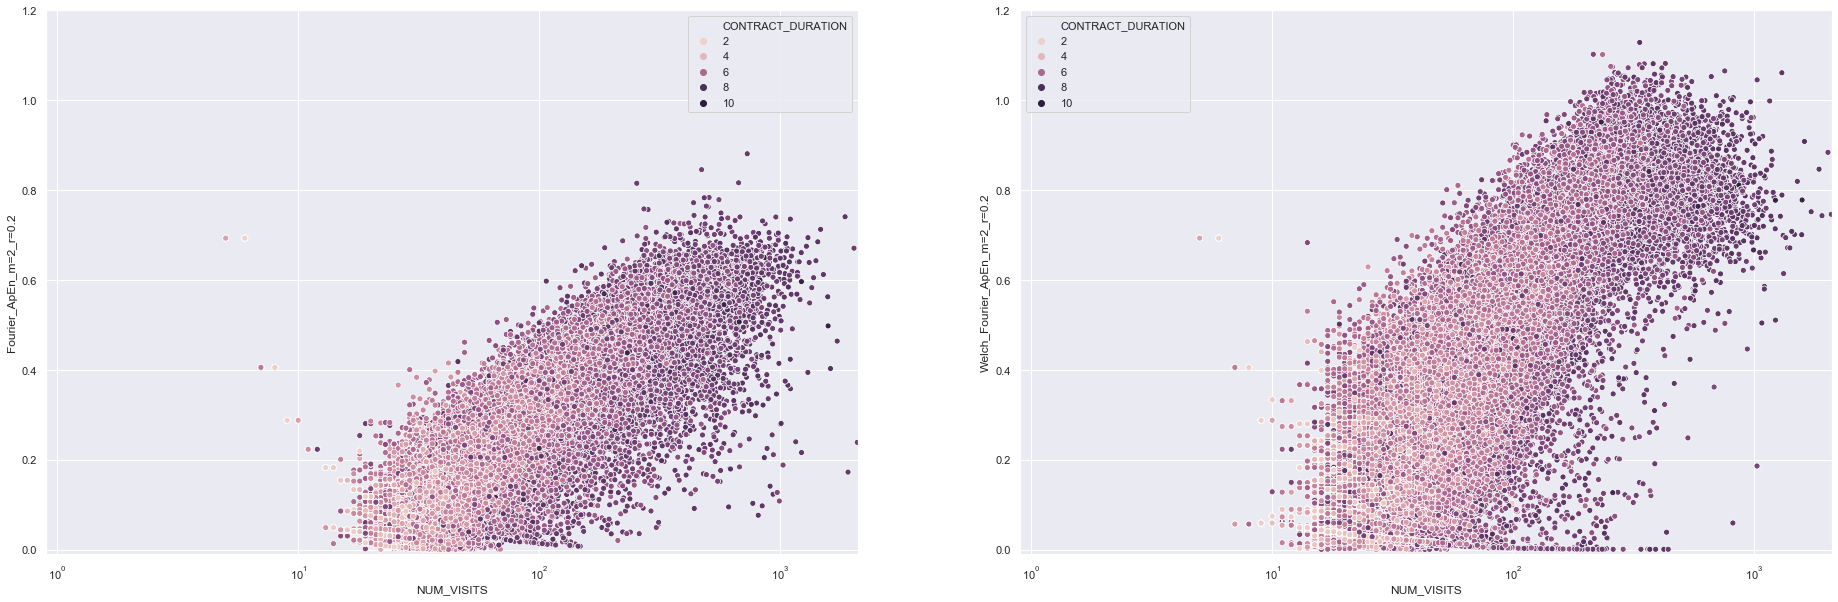

In [13]:
# Initialize figure and ax
# Set up the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

log_cd = np.log(tdfourier_result["CONTRACT_DURATION"])
# Set the scale of the x-and y-axes
ax1.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.2))
ax2.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.2))
sns.scatterplot(x="NUM_VISITS", y="Fourier_ApEn_m=2_r=0.2", hue=log_cd, data=tdfourier_result, ax=ax1)
sns.scatterplot(x="NUM_VISITS", y="Welch_Fourier_ApEn_m=2_r=0.2", hue=log_cd, data=tdfourier_result, ax=ax2)

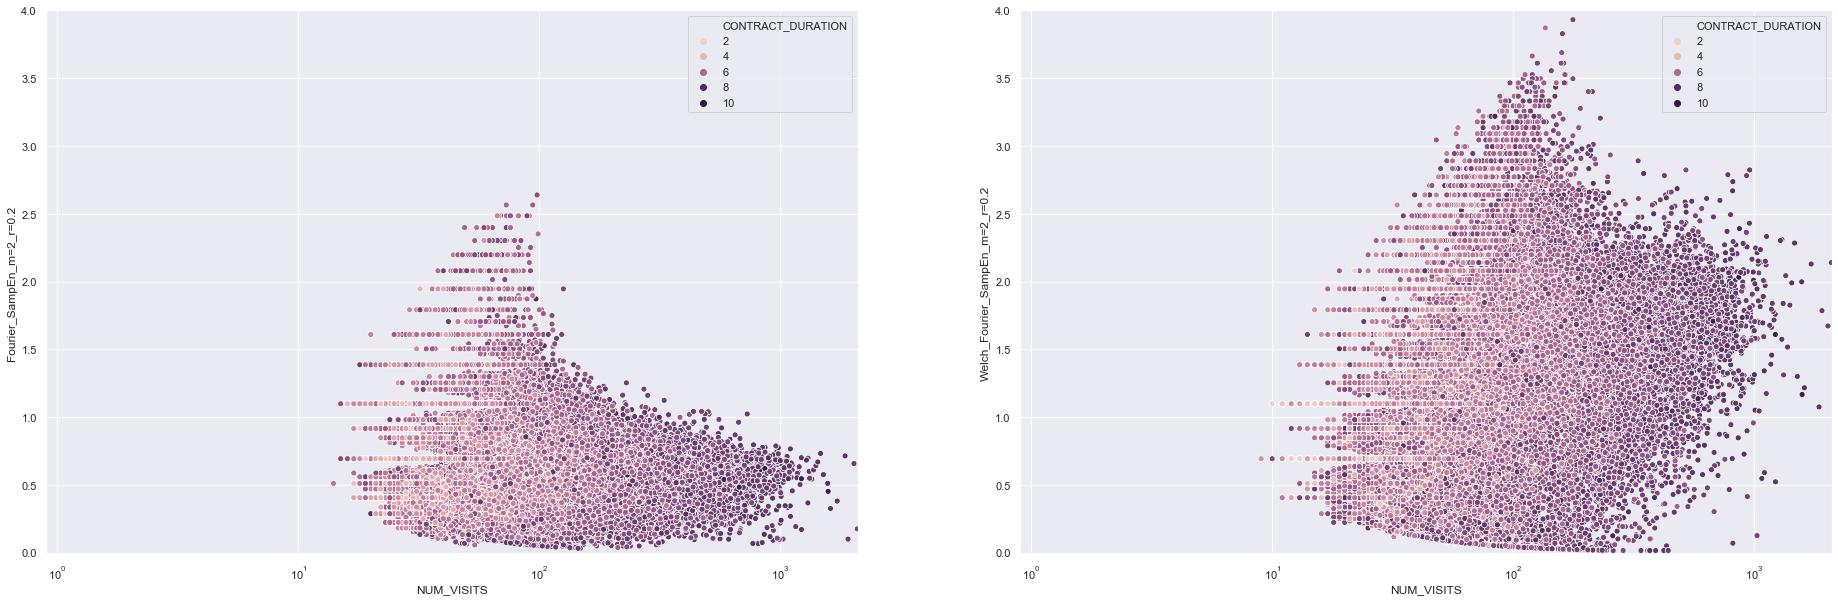

In [15]:
# Initialize figure and ax
# Set up the matplotlib figure
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax3.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,4.0))
ax4.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,4.0))
sns.scatterplot(x="NUM_VISITS", y="Fourier_SampEn_m=2_r=0.2", hue=log_cd, data=tdfourier_result, ax=ax3)
sns.scatterplot(x="NUM_VISITS", y="Welch_Fourier_SampEn_m=2_r=0.2", hue=log_cd, data=tdfourier_result, ax=ax4)

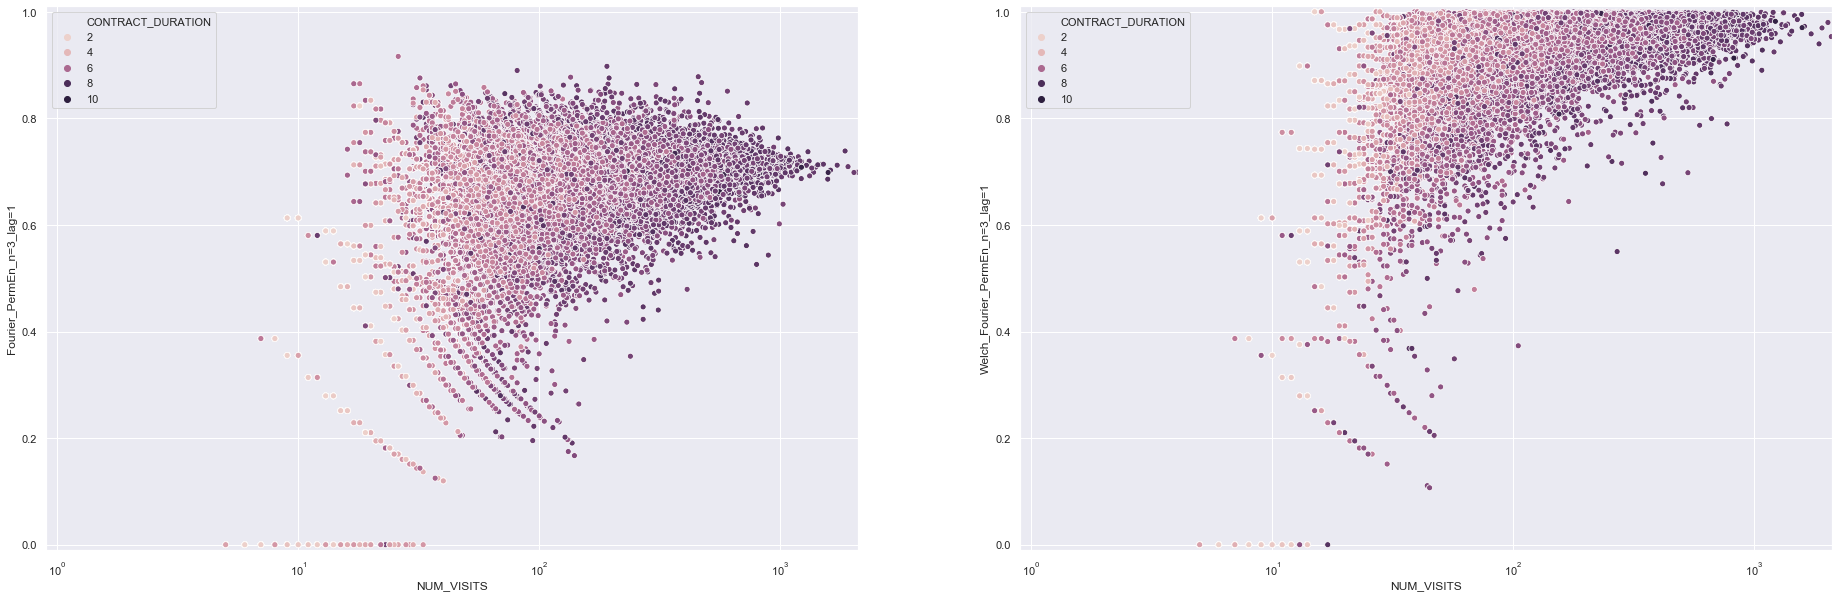

In [16]:
# Initialize figure and ax
# Set up the matplotlib figure
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax5.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.01))
ax6.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.01))
sns.scatterplot(x="NUM_VISITS", y="Fourier_PermEn_n=3_lag=1", hue=log_cd, data=tdfourier_result, ax=ax5)
sns.scatterplot(x="NUM_VISITS", y="Welch_Fourier_PermEn_n=3_lag=1", hue=log_cd, data=tdfourier_result, ax=ax6)

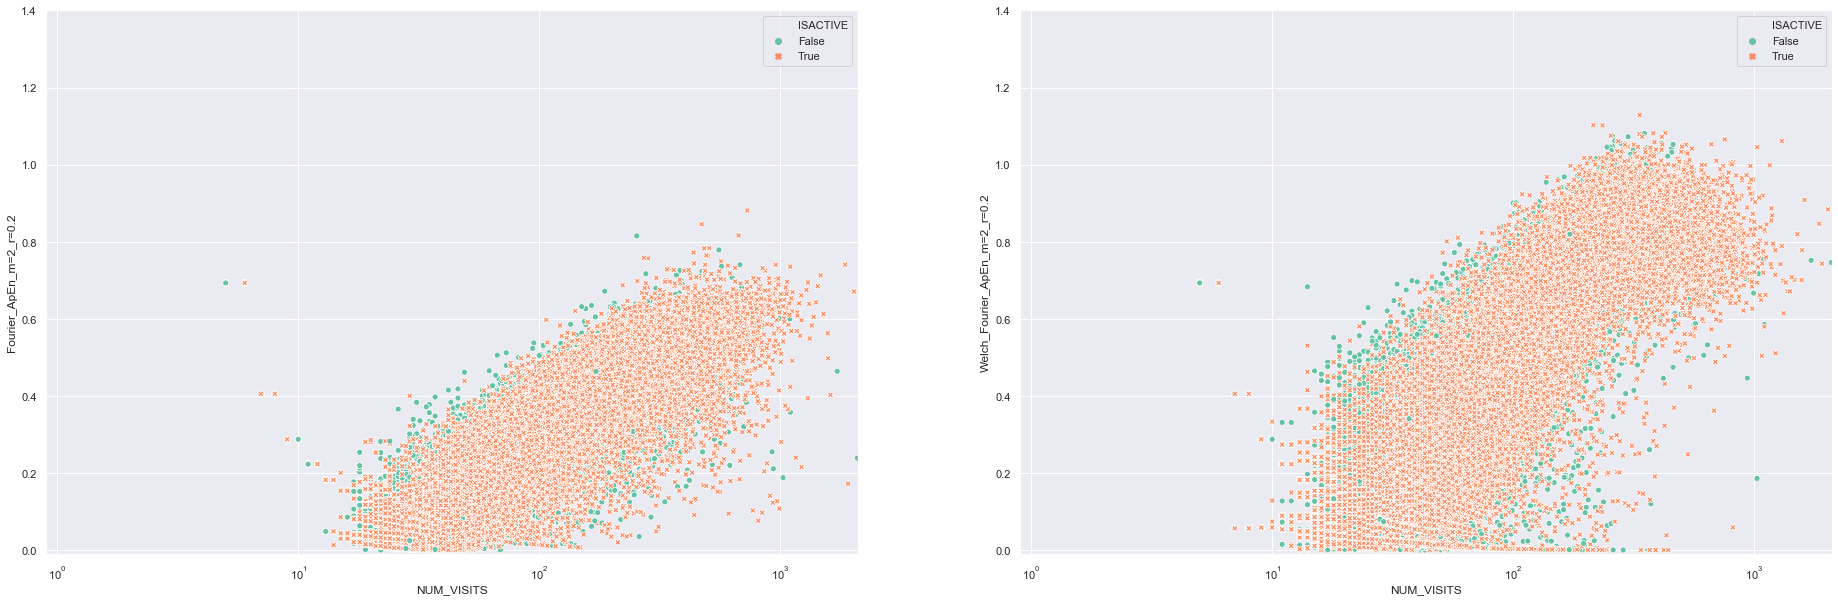

In [17]:
# Initialize figure and ax
# Set up the matplotlib figure
fig4, (ax7, ax8) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax7.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.4))
ax8.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.4))
sns.scatterplot(x="NUM_VISITS", y="Fourier_ApEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=tdfourier_result, ax=ax7)
sns.scatterplot(x="NUM_VISITS", y="Welch_Fourier_ApEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=tdfourier_result, ax=ax8)

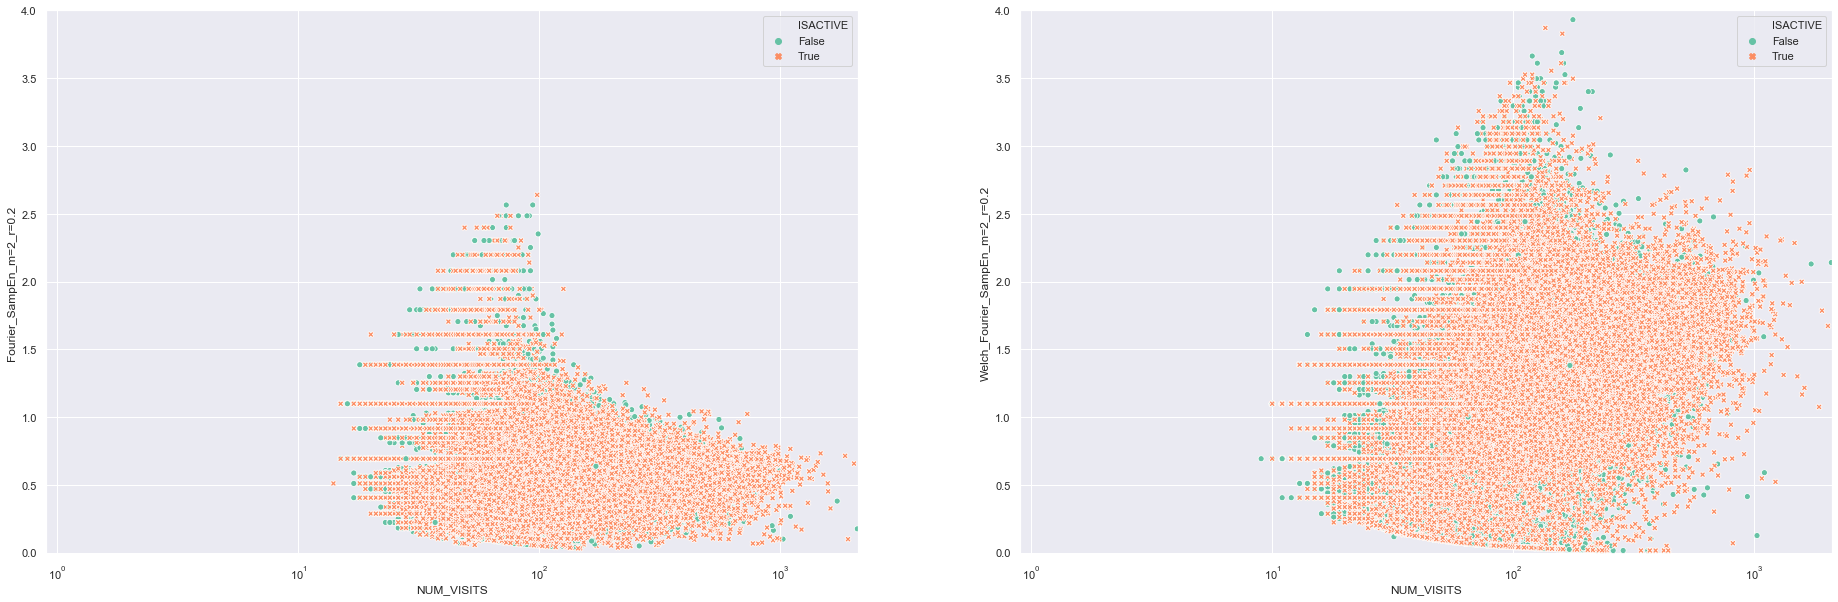

In [19]:
# Initialize figure and ax
# Set up the matplotlib figure
fig5, (ax9, ax10) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax9.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,4.0))
ax10.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,4.0))
sns.scatterplot(x="NUM_VISITS", y="Fourier_SampEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=tdfourier_result, ax=ax9)
sns.scatterplot(x="NUM_VISITS", y="Welch_Fourier_SampEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=tdfourier_result, ax=ax10)

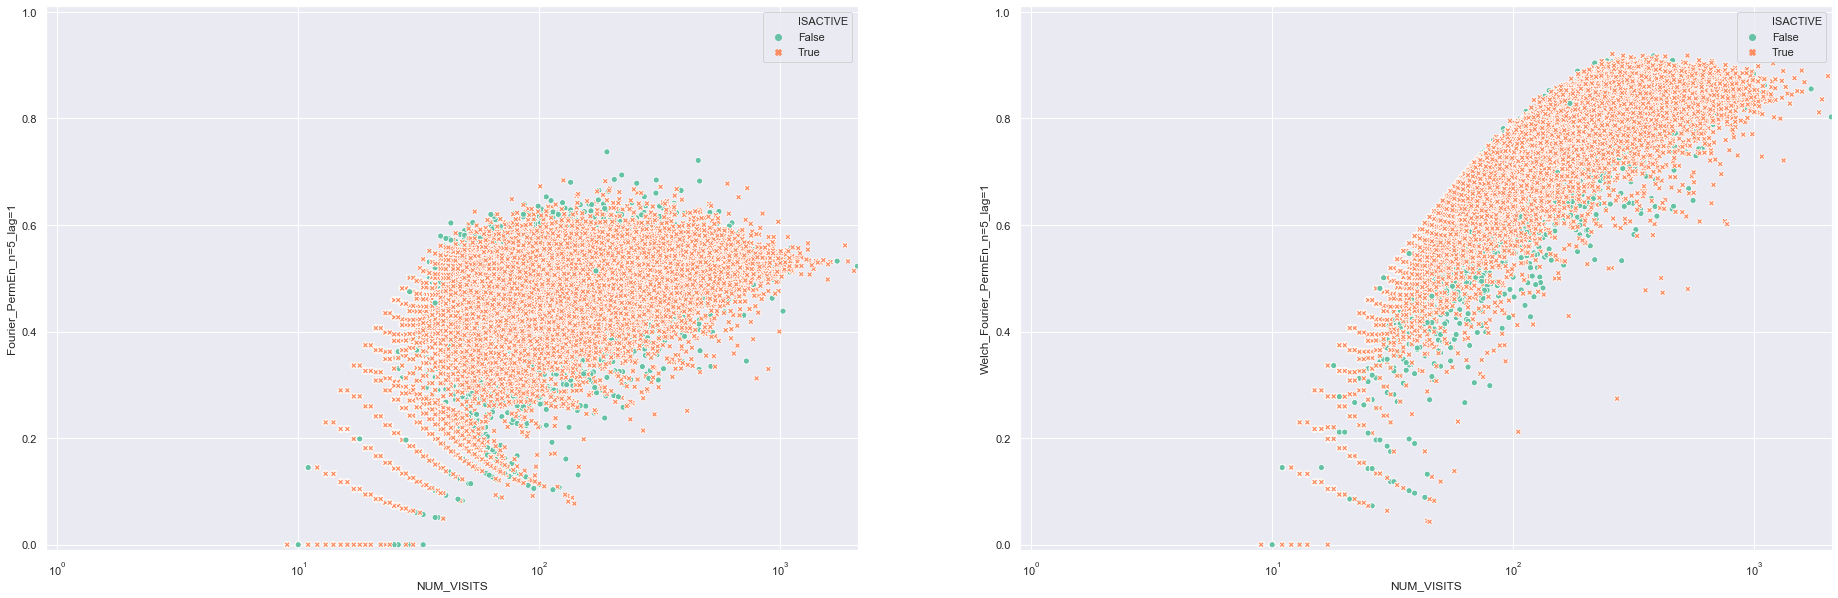

In [20]:
# Initialize figure and ax
# Set up the matplotlib figure
fig6, (ax11, ax12) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax11.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.01))
ax12.set(xscale="log", xlim=(0.9, 2100), ylim=(-0.01,1.01))
sns.scatterplot(x="NUM_VISITS", y="Fourier_PermEn_n=5_lag=1", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=tdfourier_result, ax=ax11)
sns.scatterplot(x="NUM_VISITS", y="Welch_Fourier_PermEn_n=5_lag=1", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=tdfourier_result, ax=ax12)

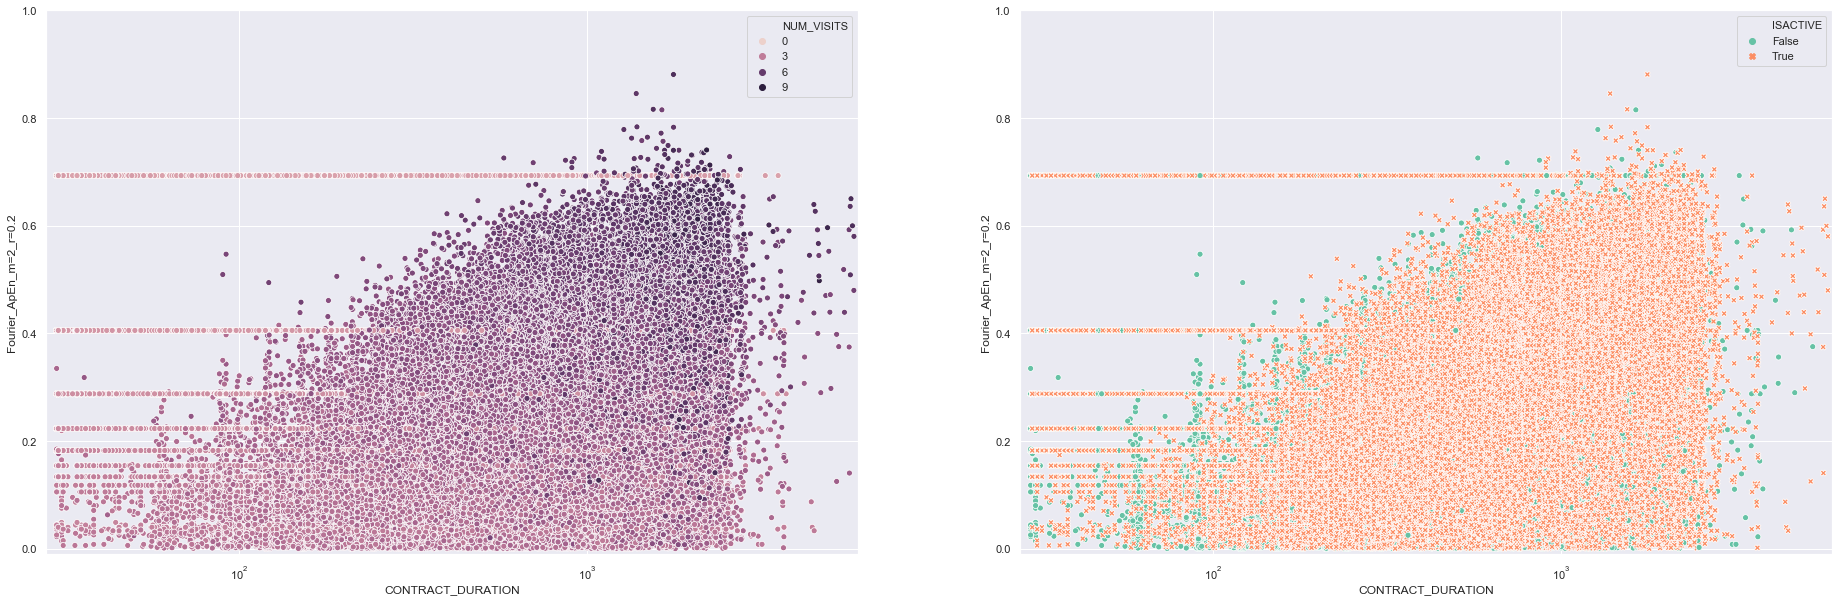

In [21]:
# Initialize figure and ax
# Set up the matplotlib figure
fig7, (ax13, ax14) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

log_nv = np.log(tdfourier_result["NUM_VISITS"])
# Set the scale of the x-and y-axes
ax13.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.0))
ax14.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.0))
sns.scatterplot(x="CONTRACT_DURATION", y="Fourier_ApEn_m=2_r=0.2", hue=log_nv, data=tdfourier_result, ax=ax13)
sns.scatterplot(x="CONTRACT_DURATION", y="Fourier_ApEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=tdfourier_result, ax=ax14)

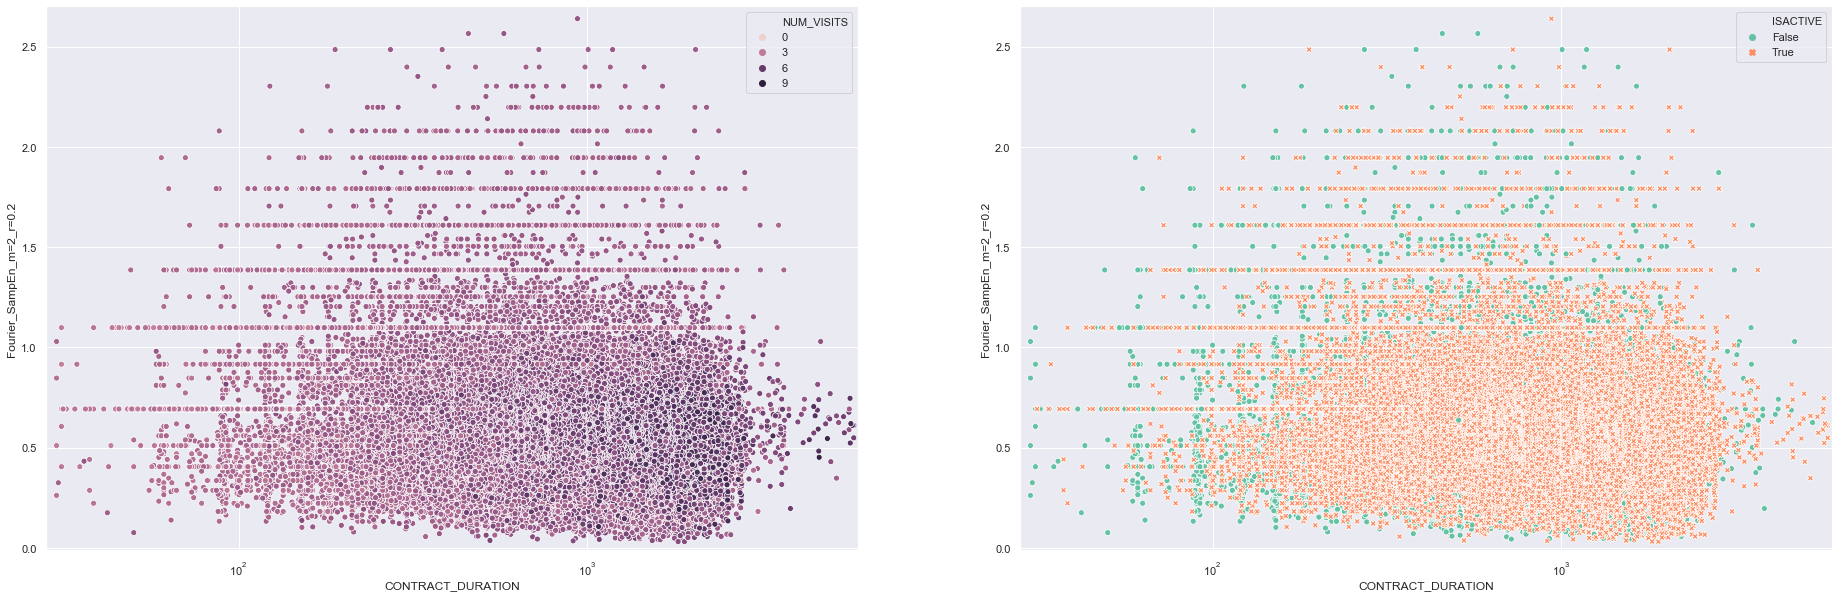

In [22]:
# Initialize figure and ax
# Set up the matplotlib figure
fig7, (ax15, ax16) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax15.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,2.7))
ax16.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,2.7))
sns.scatterplot(x="CONTRACT_DURATION", y="Fourier_SampEn_m=2_r=0.2", hue=log_nv, data=tdfourier_result, ax=ax15)
sns.scatterplot(x="CONTRACT_DURATION", y="Fourier_SampEn_m=2_r=0.2", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=tdfourier_result, ax=ax16)

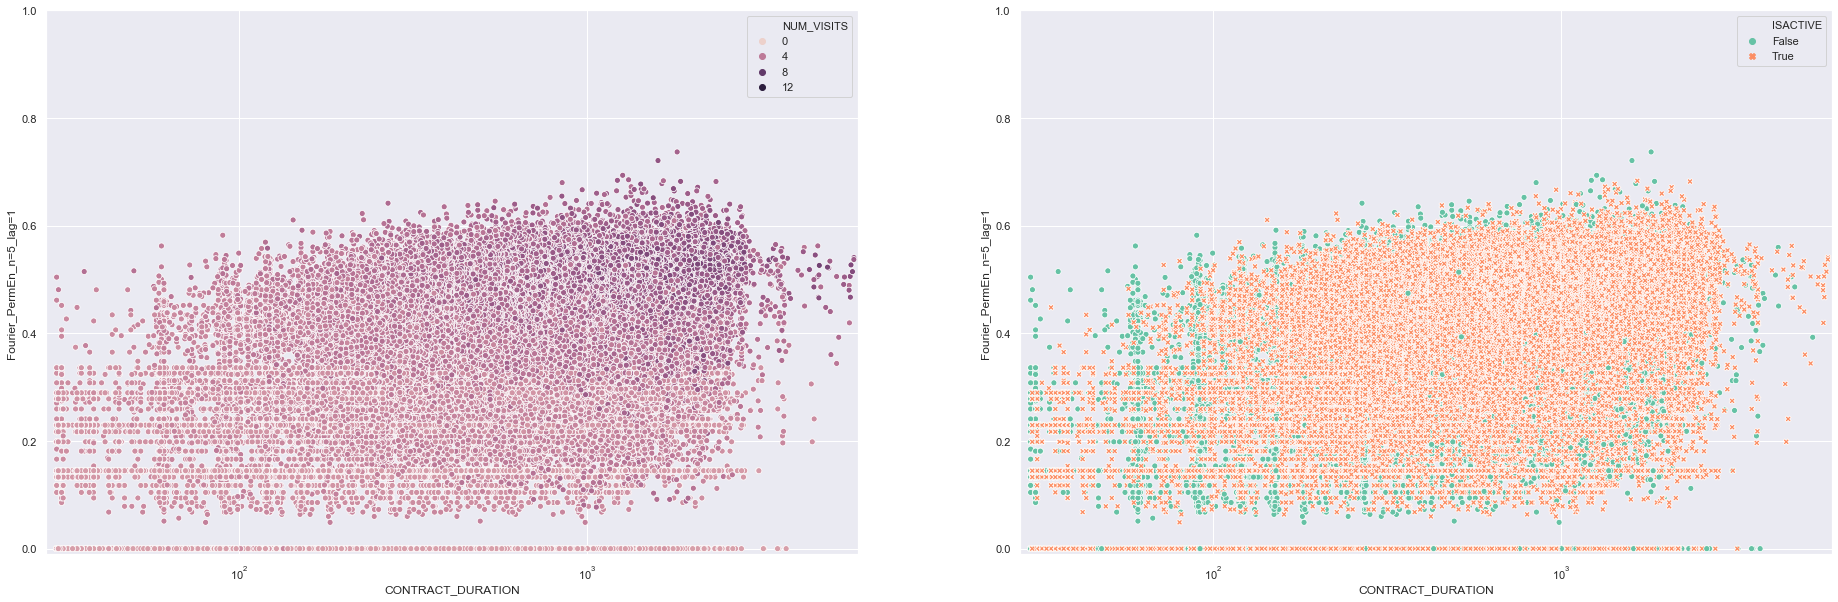

In [23]:
# Initialize figure and ax
# Set up the matplotlib figure
fig7, (ax17, ax18) = plt.subplots(1, 2, figsize=(32,10), sharex=True)

# Set the scale of the x-and y-axes
ax17.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.0))
ax18.set(xscale="log", xlim=(28, 6000), ylim=(-0.01,1.0))
sns.scatterplot(x="CONTRACT_DURATION", y="Fourier_PermEn_n=5_lag=1", hue=log_nv, hue_norm=(0,10), data=tdfourier_result, ax=ax17)
sns.scatterplot(x="CONTRACT_DURATION", y="Fourier_PermEn_n=5_lag=1", hue="ISACTIVE", style="ISACTIVE", palette="Set2", data=tdfourier_result, ax=ax18)